In [1]:
#The steps you are going to cover in this tutorial are as follows:

#Load Data.
#Define Model.
#Compile Model.
#Fit Model.
#Evaluate Model.
#Tie It All Together.

#This tutorial has a few requirements:

#You have Python 2 or 3 installed and configured.
#You have SciPy (including NumPy) installed and configured.
#You have Keras and a backend (Theano or TensorFlow) installed and configured.

#1. Load Data

#Whenever we work with machine learning algorithms that use a stochastic process (e.g. random numbers), it is a good idea to set the random number seed.

#This is so that you can run the same code again and again and get the same result. This is useful if you need to demonstrate a result, compare algorithms using the same source of randomness or to debug a part of your code.

#You can initialize the random number generator with any seed you like, for example:

In [2]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras import optimizers
#from keras.layers import Input, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.layers.core import Dense, Dropout, Activation
from keras.regularizers import l2 # L2-regularisation
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
plt.style.use('ggplot') 
import numpy as np
from sklearn.metrics import log_loss
import os
#fix random seed for reproducibility
np.random.seed(0)
# the matplotlib inline command is important, it tells jupyter notebook to show the output of the cell for charts
%matplotlib inline

poverty_data = os.path.join('poverty_data1')

Using TensorFlow backend.
/home/james/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:

#1. Load Data
#In this tutorial, we are going to use the Pima Indians onset of diabetes dataset.
#Download it from: 
#http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data
#You can now load the file directly using the NumPy function loadtxt().
#There are eight input variables and one output variable (the last column).
#Once loaded we can split the dataset into input variables (X) and the output class variable (Y).

In [4]:
#load pima indians dataset
data_paths = {'A': {'train': os.path.join(poverty_data, 'A', 'A_hhold_train.csv'),
                    'train_indiv':  os.path.join(poverty_data, 'A', 'A_indiv_train.csv'),
                    'test':  os.path.join(poverty_data, 'A', 'A_hhold_test.csv'),
                    'test_indiv':  os.path.join(poverty_data, 'A', 'A_indiv_test.csv')}, 
              
              'B': {'train': os.path.join(poverty_data, 'B', 'B_hhold_train.csv'),
                    'train_indiv': os.path.join(poverty_data, 'B', 'B_indiv_train.csv'),
                    'test_indiv': os.path.join(poverty_data, 'B', 'B_indiv_test.csv'),
                    'test':  os.path.join(poverty_data, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(poverty_data, 'C', 'C_hhold_train.csv'), 
                    'train_indiv': os.path.join(poverty_data, 'C', 'C_indiv_train.csv'),
                    'test_indiv': os.path.join(poverty_data, 'C', 'C_indiv_test.csv'),
                    'test':  os.path.join(poverty_data, 'C', 'C_hhold_test.csv')}}


In [5]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'])#, index_col= 'id')

b_train = pd.read_csv(data_paths['B']['train'])#, index_col='id')

c_train = pd.read_csv(data_paths['C']['train'])#, index_col='id')

a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

a_train_indiv = pd.read_csv(data_paths['A']['train_indiv'])#, index_col='id')

b_train_indiv = pd.read_csv(data_paths['B']['train_indiv'])#, index_col='id')

c_train_indiv = pd.read_csv(data_paths['C']['train_indiv'])#, index_col='id')

a_test_indiv = pd.read_csv(data_paths['A']['test_indiv'])#, index_col='id')
b_test_indiv = pd.read_csv(data_paths['B']['test_indiv'])#, index_col='id')
c_test_indiv = pd.read_csv(data_paths['C']['test_indiv'])#, index_col='id')



/home/james/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


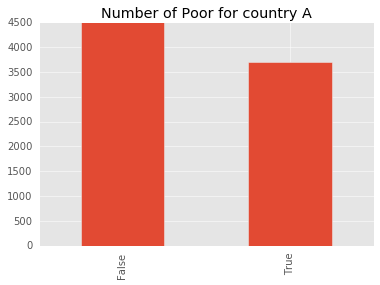

In [6]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

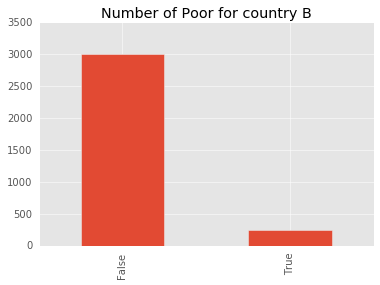

In [7]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

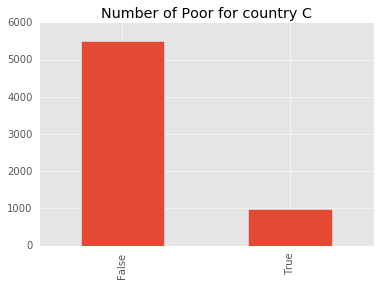

In [8]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [9]:
a_train ["poor"].value_counts()

False    4500
True     3703
Name: poor, dtype: int64

In [10]:
a_train.shape

(8203, 346)

In [11]:
b_train ["poor"].value_counts()

False    3004
True      251
Name: poor, dtype: int64

In [12]:
b_train.shape

(3255, 443)

In [13]:
c_train ["poor"].value_counts()

False    5496
True      973
Name: poor, dtype: int64

In [14]:
c_train.shape

(6469, 165)

In [15]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Columns: 346 entries, id to poor
dtypes: bool(1), int64(5), object(340)
memory usage: 21.6+ MB


In [16]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Columns: 443 entries, id to poor
dtypes: bool(1), float64(9), int64(15), object(418)
memory usage: 11.0+ MB


In [17]:
c_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Columns: 165 entries, id to poor
dtypes: bool(1), float64(1), int64(30), object(133)
memory usage: 8.1+ MB


In [18]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    #preprocessing.MinMaxScaler()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df

In [19]:
print("\nCountry A")

aX_train = pre_process_data(a_train)#.drop)'poor', axis=1))
aX_train_indiv = pre_process_data(a_train_indiv)#.drop('poor', axis=1))
aX_train = pd.merge(aX_train,aX_train_indiv, on="id",how="right")
aX_train.drop('poor_y', axis=1)
aX_train.drop('poor_x', axis=1)
ay_train = np.ravel(aX_train.poor_y)
#ay_train_indiv = np.ravel(a_train_indiv.poor)
#pd.merge(aX_train, a_train_indiv, on= 'id', how='outer')
#aX_train.merge(a_train_indiv, left_on= index_col, right_on='iid', how='outer')
#aX_train = pd.merge(aX_train_indiv, aX_train,on='id',how="left")
#aX_train = pre_process_data(a_train.drop('poor', axis=1))
#aX_train = pre_process_data(a_train_indiv.drop('poor', axis=1))
#aj_train = pd.concat([a_train['poor'],a_train_indiv['poor']],axis=0)
#ay_train = pre_process_data(aj_train)

#ay_train = np.ravel(a_train.poor)
#aX_train_indiv = pre_process_data(a_train_indiv)
#aX_train_indiv = pre_process_data(a_train_indiv.drop('iid', axis=1))


print("\Country A-TEST")
aX_test = pre_process_data(a_test)



print("Country B-TEST")
bX_test = pre_process_data(b_test)



print("Country C-TEST")
cX_test = pre_process_data(c_test)


Country A
Input shape:	(8203, 346)
After standardization (8203, 346)
After converting categoricals:	(8203, 861)
Input shape:	(37560, 44)
After standardization (37560, 44)
After converting categoricals:	(37560, 277)
\Country A-TEST
Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Country B-TEST
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Country C-TEST
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [20]:
#submission = (aX_train)

In [21]:
#submission.to_csv('aXtrain.csv')

In [22]:
aX_train.head()

,id,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,poor_x,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,...,rQWIpTiG_xUYIC,XizJGmbu_FUUXv,XizJGmbu_GtHel,XizJGmbu_juMSt,xqUooaNJ_ALcKg,xqUooaNJ_JTCKs,xqUooaNJ_UaIsy,xqUooaNJ_dSJoN,xqUooaNJ_vhhVz,country_A_y
0,1.057372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.057372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.057372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.057372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.344249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
ay_train.shape

(37560,)

In [24]:
aX_train = aX_train.dropna(axis=1, how='all')
aX_test = aX_test.dropna(axis=1, how='all')

In [25]:
#aX_train = aX_train.fillna(aX_train.mean())

In [26]:
aX_train = aX_train.fillna(0)
aX_test = aX_test.fillna(0)

In [27]:
aX_train = aX_train.drop('poor_y',axis=1)

In [28]:
aX_train = aX_train.drop('iid', axis=1)

In [29]:
aX_train = aX_train.drop('id', axis=1)

In [30]:
aX_train.shape

(37560, 274)

In [31]:
aX_train.head()

,OdXpbPGJ,ukWqmeSS,HeUgMnzF_BNCcM,HeUgMnzF_HUpWg,HeUgMnzF_JMXQx,HeUgMnzF_PAVsH,HeUgMnzF_SJPkb,HeUgMnzF_SlRmt,HeUgMnzF_TRFeI,HeUgMnzF_XJgvq,...,rQWIpTiG_xUYIC,XizJGmbu_FUUXv,XizJGmbu_GtHel,XizJGmbu_juMSt,xqUooaNJ_ALcKg,xqUooaNJ_JTCKs,xqUooaNJ_UaIsy,xqUooaNJ_dSJoN,xqUooaNJ_vhhVz,country_A_y
0,-0.223762,0.805895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.223762,0.370142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.223762,-0.719240,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,-0.991586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.223762,2.984660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
aX_test.shape

(4041, 851)

In [33]:
ay_train 

array([ True,  True,  True, ..., False, False, False])

In [34]:
print("\nCountry B")
bX_train = pre_process_data(b_train)#.drop)'poor', axis=1))
bX_train_indiv = pre_process_data(b_train_indiv)#.drop('poor', axis=1))
bX_train = pd.merge(bX_train,bX_train_indiv, on="id",how="right")
bX_train.drop('poor_y', axis=1)
bX_train.drop('poor_x', axis=1)
by_train = np.ravel(bX_train.poor_y)
#bX_train = pre_process_data(b_train.drop('poor', axis=1))
#by_train = np.ravel(b_train.poor)


Country B
Input shape:	(3255, 443)
After standardization (3255, 443)
After converting categoricals:	(3255, 1434)
Input shape:	(20252, 227)
After standardization (20252, 227)
After converting categoricals:	(20252, 1644)


In [35]:
bX_train = bX_train.drop('poor_y',axis=1)

In [36]:
bX_train = bX_train.drop('iid', axis=1)

In [37]:
bX_train = bX_train.drop('id', axis=1)

In [38]:
bX_train = bX_train.dropna(axis=1, how='all')
bX_test = bX_test.dropna(axis=1, how='all')

In [39]:
bX_train = bX_train.fillna(0)
bX_test = bX_test.fillna(0)

In [40]:
#bX_train = bX_train.fillna(bX_train.mean())

In [41]:
by_train

array([False, False, False, ..., False, False, False])

In [42]:
bX_train.head()

,BoxViLPz,qlLzyqpP,unRAgFtX,TJGiunYp,WmKLEUcd,DYgxQeEi,jfsTwowc,MGfpfHam,esHWAAyG,DtcKwIEv,...,PxgyaWYq_uojQd,PxgyaWYq_vaEub,PxgyaWYq_xUNcn,PxgyaWYq_ypdjU,PxgyaWYq_zefPK,PxgyaWYq_zvCJK,cavdrXpj_GapoC,cavdrXpj_uJXdA,cavdrXpj_yspXz,country_B_y
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.222467,0.804137,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.804137,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.835997,0.000000,0.000000,-0.349666,0.0,0.0,0.0,0.000000,0.804137,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.056358,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.000000,0.966927,0.615175,0.000000,0.0,0.0,0.0,0.000000,0.056358,0.461272,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [43]:
print("\nCountry C")
cX_train = pre_process_data(c_train)#.drop)'poor', axis=1))
cX_train_indiv = pre_process_data(c_train_indiv)#.drop('poor', axis=1))
cX_train = pd.merge(cX_train,cX_train_indiv,on="id",how="right")
cX_train.drop('poor_y', axis=1)
cX_train.drop('poor_x', axis=1)
cy_train = np.ravel(cX_train.poor_y)
#cX_train = pre_process_data(c_train.drop('poor', axis=1))
#cy_train = np.ravel(c_train.poor)


Country C
Input shape:	(6469, 165)
After standardization (6469, 165)
After converting categoricals:	(6469, 797)
Input shape:	(29913, 44)
After standardization (29913, 44)
After converting categoricals:	(29913, 303)


In [44]:
cX_train = cX_train.drop('poor_y', axis=1)

In [45]:
cX_train = cX_train.drop('iid', axis=1)

In [46]:
cX_train = cX_train.drop('id', axis=1)

In [47]:
cX_train = cX_train.dropna(axis=1, how='all')


In [48]:
#cX_train = cX_train.fillna(cX_train.mean())

In [49]:
cX_train = cX_train.dropna(axis=1, how='all')


In [50]:
cX_train.head()

,XKQWlRjk,vWNISgEA,bsMfXBld,XKyOwsRR,CgAkQtOd,OoqEwyJF_RuCZA,OoqEwyJF_cEcbt,cJPCnaAs_BZKME,cJPCnaAs_DMxNA,cJPCnaAs_Eadzw,...,sCTSWhXf_yQhuJ,rVneGwzn_QGHnL,rVneGwzn_UXHpZ,rVneGwzn_ldKFc,rVneGwzn_xgpHA,uVFOfrpa_DnIbO,uVFOfrpa_kXobL,uVFOfrpa_oacjJ,uVFOfrpa_xRxWC,country_C_y
0,2.459952,-0.420516,0.402120,-0.710936,0.390934,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.357733,-0.420516,0.402120,-0.710936,0.390934,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,-0.009835,-0.420516,0.402120,-0.710936,0.390934,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.009835,2.584349,-2.676993,0.186228,-1.914076,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.009835,2.869020,-3.528663,0.143506,-2.064371,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [51]:
cy_train

array([False, False, False, ..., False, False, False])

In [52]:
a_num_features = aX_train.shape[1]
b_num_features = bX_train.shape[1]
c_num_features = cX_train.shape[1]

In [53]:
#l1_lambda = 0.01 # use 0.001 as a L2-regularisation factor

In [54]:
model = Sequential()
model.add(Dense(200, kernel_initializer = 'uniform', input_dim = a_num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'uniform',  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [55]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.fit(aX_train, ay_train, epochs=100, batch_size=10)


Epoch 1/100
37560/37560 [==============================] - 13s 353us/step - loss: 0.5565 - acc: 0.7088
Epoch 2/100
37560/37560 [==============================] - 13s 354us/step - loss: 0.5557 - acc: 0.7080
Epoch 3/100
37560/37560 [==============================] - 14s 360us/step - loss: 0.5532 - acc: 0.7084
Epoch 4/100
37560/37560 [==============================] - 13s 359us/step - loss: 0.5515 - acc: 0.7101
Epoch 5/100
37560/37560 [==============================] - 14s 364us/step - loss: 0.5489 - acc: 0.7128
Epoch 6/100
37560/37560 [==============================] - 14s 364us/step - loss: 0.5479 - acc: 0.7136
Epoch 7/100
37560/37560 [==============================] - 14s 364us/step - loss: 0.5465 - acc: 0.7135
Epoch 8/100
37560/37560 [==============================] - 14s 365us/step - loss: 0.5448 - acc: 0.7163
Epoch 9/100
37560/37560 [==============================] - 14s 364us/step - loss: 0.5425 - acc: 0.7163
Epoch 10/100
37560/37560 [==============================] - 14s 364us/ste

In [61]:
#evaluate model
scores = model.evaluate(aX_train, ay_train)
print("\n%s: %.2f%%:" % (model.metrics_names[1], scores[1]*100))

37560/37560 [==============================] - 2s 52us/step

acc: 77.17%:


In [62]:
aX_test = pre_process_data(aX_test, enforce_cols=aX_train.columns)
#bX_test = pre_process_data(bX_test, enforce_cols=bX_train.columns)
#cX_test = pre_process_data(cX_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 274)
After standardization (4041, 274)
After converting categoricals:	(4041, 274)


In [63]:
aX_preds= model.predict(aX_test)
#round predictions
rounded = [round(x[0]) for x in aX_preds]
print(rounded)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [60]:
l2_lambda = 0.01 # use 0.0001 as a L2-regularisation factor

In [61]:
model = Sequential()
model.add(Dense(200, kernel_initializer = 'uniform', input_dim = b_num_features, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(4, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# kernel_regularizer=l2(l2_lambda),

In [62]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.fit(bX_train, by_train, epochs=30, batch_size=50)

Epoch 1/30
20252/20252 [==============================] - 5s 224us/step - loss: 0.4987 - acc: 0.9065
Epoch 2/30
20252/20252 [==============================] - 4s 215us/step - loss: 0.4249 - acc: 0.9073
Epoch 3/30
20252/20252 [==============================] - 4s 217us/step - loss: 0.3813 - acc: 0.9073
Epoch 4/30
20252/20252 [==============================] - 4s 218us/step - loss: 0.3516 - acc: 0.9073
Epoch 5/30
20252/20252 [==============================] - 4s 217us/step - loss: 0.3291 - acc: 0.9073
Epoch 6/30
20252/20252 [==============================] - 4s 216us/step - loss: 0.3178 - acc: 0.9073
Epoch 7/30
20252/20252 [==============================] - 4s 217us/step - loss: 0.3108 - acc: 0.9073
Epoch 8/30
20252/20252 [==============================] - 4s 218us/step - loss: 0.3060 - acc: 0.9073
Epoch 9/30
20252/20252 [==============================] - 4s 220us/step - loss: 0.3035 - acc: 0.9073
Epoch 10/30
20252/20252 [==============================] - 4s 222us/step - loss: 0.3024 - a

In [64]:
#evaluate model
scores = model.evaluate(bX_train, by_train)
print("\n%s: %.2f%%:" % (model.metrics_names[1], scores[1]*100))

20252/20252 [==============================] - 2s 86us/step

acc: 90.73%:


In [65]:
bX_test = pre_process_data(b_test, enforce_cols=bX_train.columns)

Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)


In [66]:
bX_preds = model.predict(bX_test)
#round predictions
rounded = [round(x[0]) for x in bX_preds]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [67]:
#l3_lambda = 0.001 # use 0.01 as a L2-regularisation factor

In [68]:
model = Sequential()
model.add(Dense(200, kernel_initializer = 'uniform', input_dim = c_num_features, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(4, kernel_initializer = 'uniform', activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

In [69]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False)
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.fit(cX_train, cy_train, epochs=30, batch_size=50)

Epoch 1/30
29913/29913 [==============================] - 3s 95us/step - loss: 0.5870 - acc: 0.7644
Epoch 2/30
29913/29913 [==============================] - 3s 87us/step - loss: 0.5391 - acc: 0.7643
Epoch 3/30
29913/29913 [==============================] - 3s 87us/step - loss: 0.5262 - acc: 0.7649
Epoch 4/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5216 - acc: 0.7653
Epoch 5/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5188 - acc: 0.7655
Epoch 6/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5191 - acc: 0.7656
Epoch 7/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5176 - acc: 0.7661
Epoch 8/30
29913/29913 [==============================] - 3s 89us/step - loss: 0.5172 - acc: 0.7671
Epoch 9/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5174 - acc: 0.7655
Epoch 10/30
29913/29913 [==============================] - 3s 88us/step - loss: 0.5194 - acc: 0.7661

In [71]:
#evaluate model
scores = model.evaluate(cX_train, cy_train)
print("\n%s: %.2f%%:" % (model.metrics_names[1], scores[1]*100))

29913/29913 [==============================] - 2s 50us/step

acc: 76.45%:


In [72]:
cX_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [73]:
cX_preds = model.predict(cX_test)
#round predictions
rounded = [round(x[0]) for x in cX_preds]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [64]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 0],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [65]:
# convert preds to data frames
a_sub = make_country_sub(aX_preds, aX_test, 'A')
b_sub = make_country_sub(bX_preds, bX_test, 'B')
c_sub = make_country_sub(cX_preds, cX_test, 'C')

NameError: name 'bX_preds' is not defined

In [66]:
submission = pd.concat([a_sub, b_sub, c_sub])

NameError: name 'b_sub' is not defined

In [89]:
submission.head(20)

,country,poor
id,,
418,A,0.526383
41249,A,0.526383
16205,A,0.526383
97501,A,0.526383
67756,A,0.526383
17938,A,0.526383
19036,A,0.526383
61587,A,0.526383
57571,A,0.526383


In [90]:
submission.tail(20)

,country,poor
id,,
88475,C,0.297106
96504,C,0.297106
51200,C,0.297106
94912,C,0.297106
7588,C,0.297106
35668,C,0.297106
6137,C,0.297106
87474,C,0.297106
99992,C,0.297106


In [91]:
submission.to_csv('submission.csv')